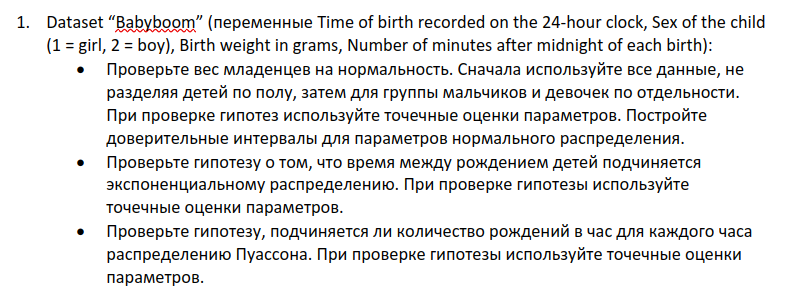

In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import scipy.stats as st
sns.set() 

cols = ['Time of birth', 'Sex', 'weight', 'Minutes after midnight']
df = pd.read_fwf('babyboom.dat.txt', header=None, widths=[8, 11, 8, 8], names=cols)

df.head()

,Time of birth,Sex,weight,Minutes after midnight
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177


## Проверка веса на нормальность

In [2]:
dfd = df.loc[(df['Sex'] == 1)]
dfm = df.loc[(df['Sex'] == 2)]

#### Графики
 Общий:

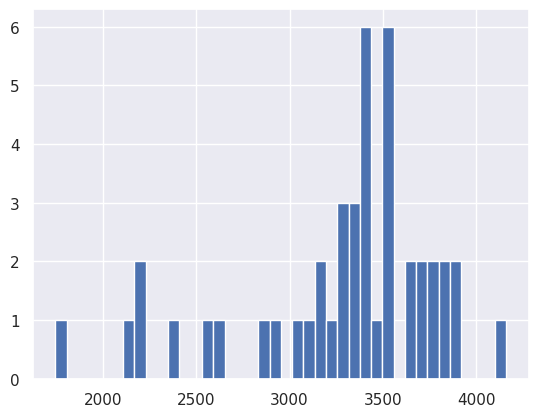

In [3]:
plt.hist(x=df['weight'], bins=40);

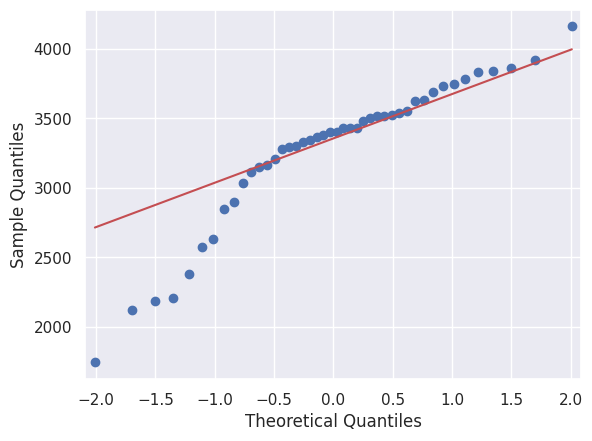

In [4]:
sm.qqplot(df['weight'], line='q')
plt.show()

сравниваем эмпирические и теоритические квантили



#### Мальчики

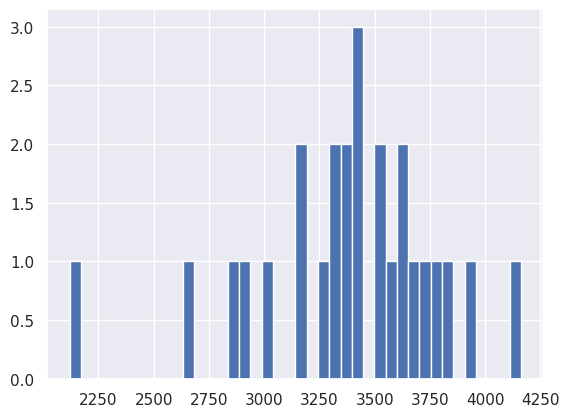

In [5]:
plt.hist(x=dfm['weight'], bins=40);

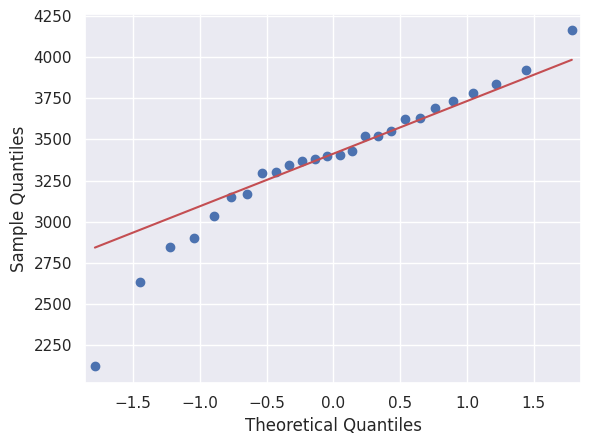

In [6]:
sm.qqplot(dfm['weight'], line='q')
plt.show()

#### Девочки

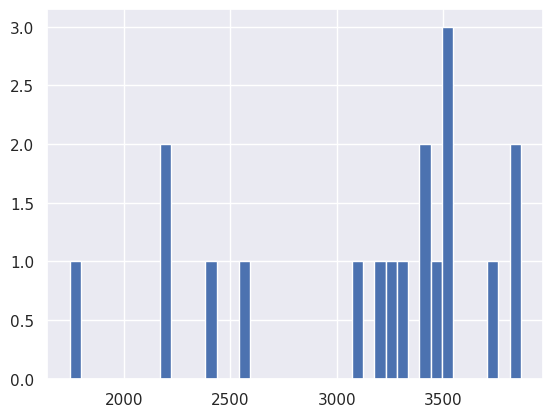

In [7]:
plt.hist(x=dfd['weight'], bins=40);

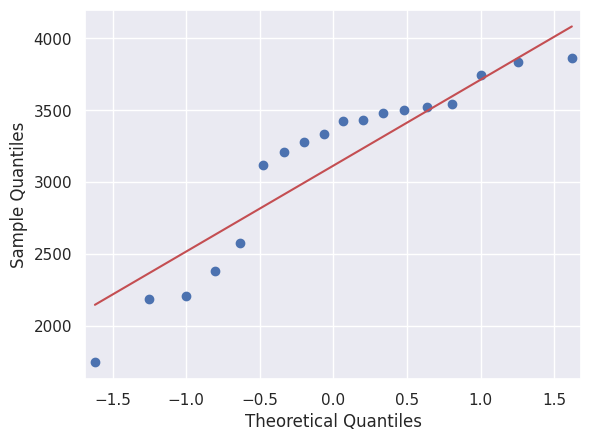

In [8]:
sm.qqplot(dfd['weight'], line='q')
plt.show()

#####  Критерий Колмогорова
![Alt text](image-3.png)

In [9]:
print(sm.stats.diagnostic.lilliefors(df['weight'], dist='norm', pvalmethod='table'))
print("М", sm.stats.diagnostic.lilliefors(dfm['weight'], dist='norm', pvalmethod='table'))
print("Ж", sm.stats.diagnostic.lilliefors(dfd['weight'], dist='norm', pvalmethod='table'))

(0.18336357215784677, 0.0009999999999998899)
М (0.15544307065675722, 0.1059581856011847)
Ж (0.21427812399671214, 0.02846526863248284)


(D, p)

D - Статистика теста Колмогорова-Смирнова с расчетным средним значением и дисперсией.

Значение p ниже уровня значимости критерия 0,05, нулевую гипотезу о том, что выборка извлечена из нормальной генеральной совокупности **не принимаем**.

##### Критерий Андерсона-Дарлина
![Alt text](image-4.png)

In [10]:
print(sm.stats.diagnostic.normal_ad(df['weight']))
print("М", sm.stats.diagnostic.normal_ad(dfm['weight']))
print("Ж", sm.stats.diagnostic.normal_ad(dfd['weight']))

(1.7168461277690383, 0.00017877240330711942)
М (0.47246625627482786, 0.22375107839639316)
Ж (1.0265607371000236, 0.007984332705229509)


##### Критерий Крамера-фон-Мизеса
![Alt text](image-5.png)

In [11]:
print(st.kstest(df['weight'], st.norm.cdf))
print("M", st.kstest(dfm['weight'], st.norm.cdf))
print("Ж", st.kstest(dfd['weight'], st.norm.cdf))

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=1745, statistic_sign=-1)
M KstestResult(statistic=1.0, pvalue=0.0, statistic_location=2121, statistic_sign=-1)
Ж KstestResult(statistic=1.0, pvalue=0.0, statistic_location=1745, statistic_sign=-1)


#### Критерий Шапиро-Уилка
![Alt text](image-7.png)

In [12]:
print(st.shapiro(df['weight']))
print('М', st.shapiro(dfm['weight']))
print('Ж', st.shapiro(dfd['weight']))

ShapiroResult(statistic=0.8987231254577637, pvalue=0.0009944075718522072)
М ShapiroResult(statistic=0.9474740624427795, pvalue=0.20224997401237488)
Ж ShapiroResult(statistic=0.8702831268310547, pvalue=0.017984924837946892)


#### Критерий Харке–Бера
![Alt text](image-8.png)

In [13]:
print(st.jarque_bera(df['weight']))
print('М', st.jarque_bera(dfm['weight']))
print('Ж', st.jarque_bera(dfd['weight']))

SignificanceResult(statistic=10.351560931737778, pvalue=0.005651804151933801)
М SignificanceResult(statistic=5.570161003315512, pvalue=0.061724119936972875)
Ж SignificanceResult(statistic=2.477896004137788, pvalue=0.28968880972449024)


### Доверительные интервалы для парметров нормального распределения

Существует вероятность 95%, что доверительный интервал содержит истинный средний вес детей

In [14]:
print(st.norm.interval(0.95, loc=np.mean(df['weight']), scale=st.sem(df['weight'])))
print("M", st.norm.interval(0.95, loc=np.mean(dfm['weight']), scale=st.sem(dfm['weight'])))
print("Ж", st.norm.interval(0.95, loc=np.mean(dfd['weight']), scale=st.sem(dfd['weight'])))

(3119.9337914896673, 3431.9752994194237)
M (3210.7751109157757, 3539.840273699609)
Ж (2840.6735615476045, 3424.215327341284)


###

## Проверка гипотезы о том, что время между рождением детей подчиняется экспоненциальному распределению

![Alt text](image-10.png)

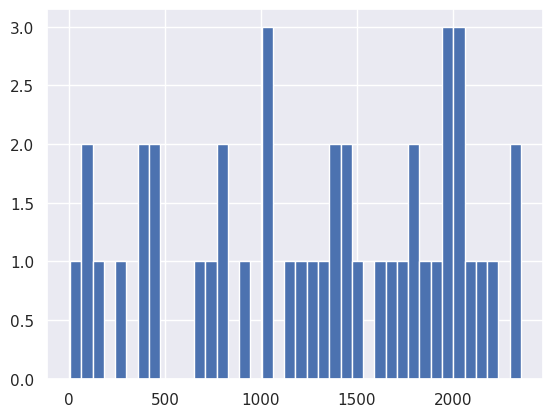

In [15]:
plt.hist(x=df['Time of birth'], bins=40);

##### Двувыборочный критерий Колмогорова-Смирнова
![Alt text](image-6.png)

##### chi^2

In [16]:
st.chisquare(df['Time of birth'])

Power_divergenceResult(statistic=15828.80401234568, pvalue=0.0)

### Количество рождения в час - распределение Пауссона
![Alt text](image-11.png)

In [17]:
intervals = []
mins = 0
for i in range(24):
    intervals.append(mins)
    mins += 60

hour = []
for i in df['Minutes after midnight']:
    for j in range(1, len(intervals)):
        if i >= intervals[j-1] and i<intervals[j]:
            
            hour.append(j)
            break
hour.append(24)
hour.append(24)
df.insert(loc= 0 , column=f'h', value=hour)

df.head()

,h,Time of birth,Sex,weight,Minutes after midnight
0,1,5,1,3837,5
1,2,104,1,3334,64
2,2,118,2,3554,78
3,2,155,2,3838,115
4,3,257,2,3625,177


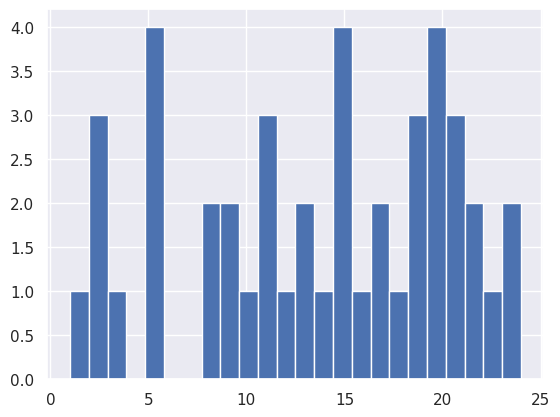

In [18]:
plt.hist(x=df['h'], bins=24);

[10  9  9 11 15 12 13 14 14  9 15  6 12  9  7  9  9 11  8 10  6  9 11 11
 15  4  8  7 14 14 12 12 12  9  9 12 11 16 12  4 19 12 11 13]


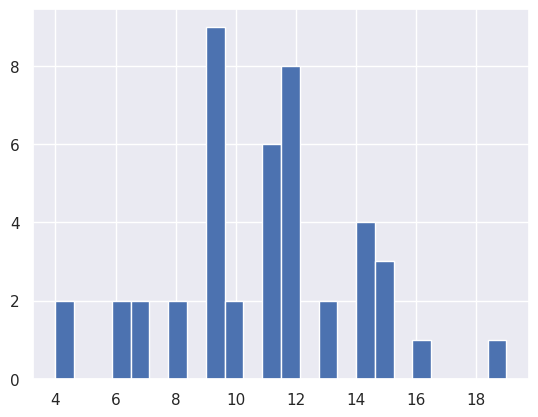

In [19]:
pois = st.poisson.rvs(mu=12, size=44)
print(pois)
plt.hist(x=pois, bins=24);

In [20]:
st.chisquare(df['h'])

Power_divergenceResult(statistic=148.3388704318937, pvalue=1.663984635566369e-13)